# Примеры и упражнения по Python3 - уровень с графикой

Автор-составитель - Михаил Колодин

Версия 2021-04-21 от 2021-05-21 - 3.1

Разделы:
* Библиотека PIL
    * [Случайное искусство](#randart)
    * [Тетрадки](#copybooks)
    * [Неквадратные плоскости](#nonsquare)

---
**Случайное искусство** <a name=randart>

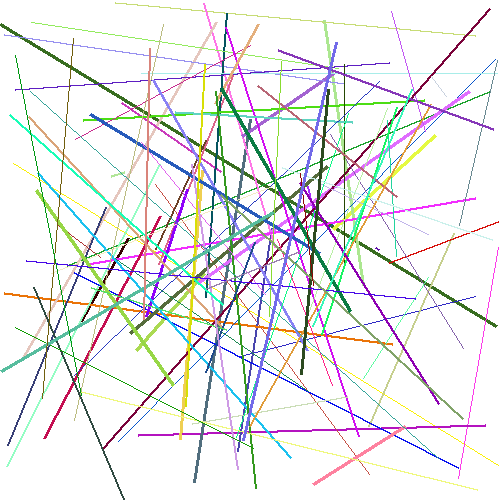

In [19]:
from PIL import Image, ImageDraw
import random
ri = random.randint

SIZE = 500
WHITE = 255, 255, 255
BLACK = 0, 0, 0
COUNT = 100

im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)
 
for i in range(COUNT):
    p1x = ri(0, SIZE)
    p1y = ri(0, SIZE)
    p2x = ri(0, SIZE)
    p2y = ri(0, SIZE)
    rcolor = ri(0, 255), ri(0, 255), ri(0, 255)
    rwidth = ri(1, 3)
    draw.line((p1x, p1y, p2x, p2y), fill=rcolor, width=rwidth)
 
#im.show()
im.save('pil-cp01.jpg', quality=95)
im

**Тетрадки** <a name=randart>

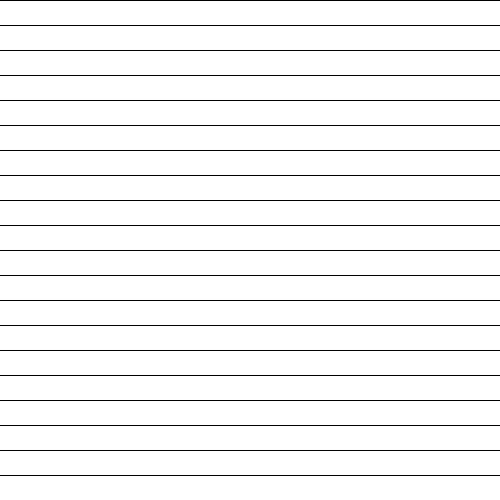

In [21]:
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)
 
for i in range(0, SIZE, SIZE//20):
    draw.line((0, i, SIZE, i), fill=BLACK, width=1)
 
#im.show()
im.save('pil-cp02.jpg', quality=95)
im

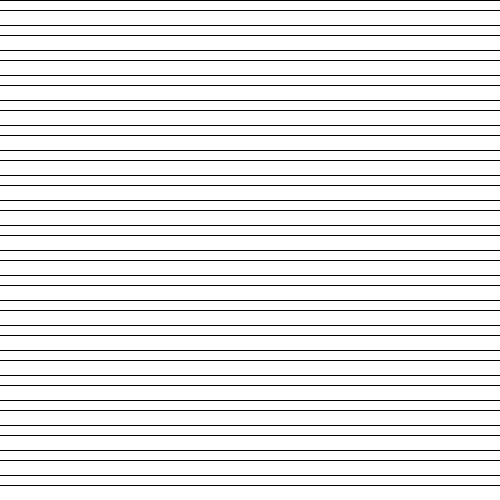

In [22]:
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)
 
for i in range(0, SIZE, SIZE//20):
    draw.line((0, i, SIZE, i), fill=BLACK, width=1)
    draw.line((0, i+10, SIZE, i+10), fill=BLACK, width=1)
 
#im.show()
im.save('pil-cp03.jpg', quality=95)
im

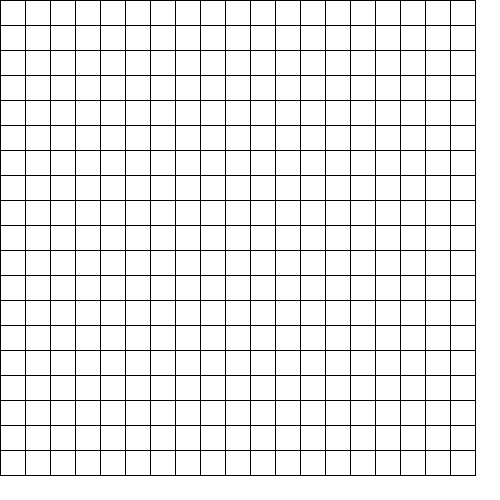

In [40]:
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)

STEPS = 20
BDR = (SIZE-1) // STEPS * STEPS -5
LMT = BDR
for i in range(0, SIZE, SIZE // STEPS):
    draw.line((0, i, LMT, i), fill=BLACK, width=1)
    draw.line((i, 0, i, LMT), fill=BLACK, width=1)
 
#im.show()
im.save('pil-cp04.jpg', quality=95)
im

---
**Неквадратные плоскости** <a name=nonsquare></a>

***Примитивные треугольники (не правильные)***

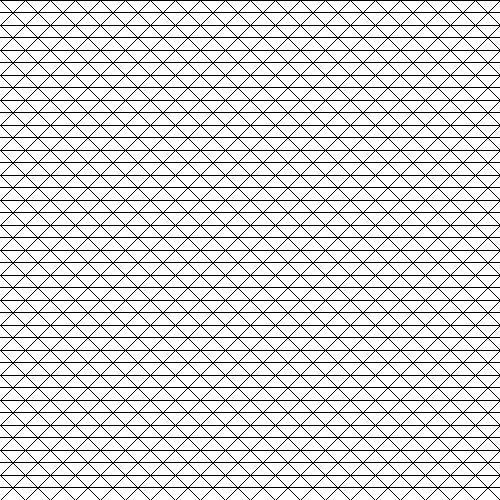

In [46]:
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)

STEPS = 20
for i in range(0, SIZE, SIZE // STEPS):
    draw.line((0, i, i, 0), fill=BLACK, width=1)
    draw.line((i, SIZE, SIZE, i), fill=BLACK, width=1)

    draw.line((0, i, SIZE-i, SIZE), fill=BLACK, width=1)
    draw.line((i, 0, SIZE, SIZE-i), fill=BLACK, width=1)

    draw.line((0, i, SIZE, i), fill=BLACK, width=1)
    draw.line((0, i//2, SIZE, i//2), fill=BLACK, width=1)
    draw.line((0, SIZE//2 + i//2, SIZE, SIZE//2 + i//2), fill=BLACK, width=1)

#im.show()
im.save('pil-cp05.jpg', quality=95)
im

---
***Правильные треугольники***

In [79]:
# init all
from math import sin, cos, pi
grad = pi / 180.
#eps = 1 / 64
rdig = 3  # round to rdig digits after decimal point
LIM = 10.

# 1st triangle (tri)
p0x = p0y = 0.
p1x = 1.; p1y = 0.
p2x = cos(60. *grad)
p2y = sin(60. *grad)
p2x = round(p2x, rdig)
p2y = round(p2y, rdig)
print(f"{rdig=}, {grad=}")
print(f"{p0x=}, {p0y=}, {p1x=}, {p1y=}, {p2x=}, {p2y=}")
tri = (p0x, p0y), (p1x, p1y), (p2x, p2y)
print(tri)
alltri = [tri]
print(f"{alltri=}")
points = set()
points |= {y for x in alltri for y in x}
print(f"{points=}")
allotr = set()
allotr |= { (p0x, p0y, p1x, p1y), (p1x, p1y, p2x, p2y), (p2x, p2y, p0x, p0y) }
print(f"{allotr=}")

rdig=3, grad=0.017453292519943295
p0x=0.0, p0y=0.0, p1x=1.0, p1y=0.0, p2x=0.5, p2y=0.866
((0.0, 0.0), (1.0, 0.0), (0.5, 0.866))
alltri=[((0.0, 0.0), (1.0, 0.0), (0.5, 0.866))]
points={(1.0, 0.0), (0.5, 0.866), (0.0, 0.0)}
allotr={(0.5, 0.866, 0.0, 0.0), (0.0, 0.0, 1.0, 0.0), (1.0, 0.0, 0.5, 0.866)}


In [ ]:
def make1(a, b, c):
    """ make 1 new triangle, reflecting point c relatevely to line [a, b]"""
    ...

In [ ]:
def make3(tri):
    """ make 3 new tri-s (if within LIMits)"""
    nt1 = make1(tri[0], tri[1], tri[2])
    nt2 = make1(tri[1], tri[2], tri[0])
    nt3 = make1(tri[0], tri[2], tri[1])
    nts = tuple(filter(lambda x: len, (nt1, nt2, nt3) ))
    return nts    

In [80]:
# make other tri-s
while True:
    for tri in alltri:
        newtris = make3(tri)
    if not newtris: break

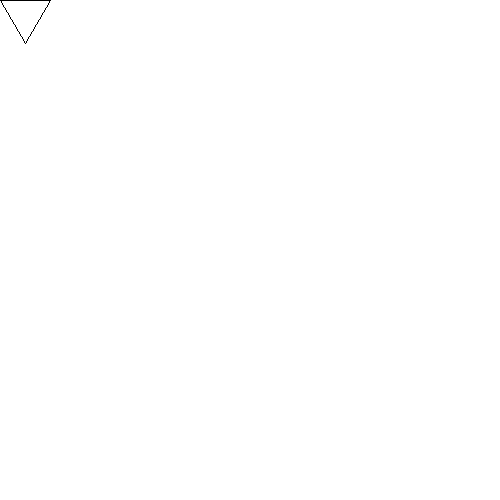

In [73]:
SCALE = 50.
SIZE = 500
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)

for otr in allotr:
    sotr = [x * SCALE for x in otr]
    draw.line(sotr, fill=BLACK, width=1)
    
#im.show()
im.save('pil-cp06.jpg', quality=95)
im

Правильные шестиугольники (соты)

In [48]:
pass